## Visual comparison of isopolygons calculated with OSM 
- Calculation with OSM calculator as written from gpbp package
- Calculation with OSM calculator alternative

Around a fictional hospital, distance 1 km, using the walking road network of Alameda

In [53]:
%load_ext autoreload
%autoreload 2


from matplotlib import pyplot as plt
import networkx as nx
import osmnx as ox
import geopandas as gpd
import pandas as pd
from shapely import Polygon
from pisa.isopolygons import OsmIsopolygonCalculatorAlternative, OsmIsopolygonCalculator


# run %pip install contextily first
import contextily



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
unprojected_crs = "EPSG:4326"
web_mercator_crs = "EPSG:3857"

### Prepare hospital and road network

In [ ]:

hospital_coordinates = [
        (-122.2314069, 37.7687054),  # closest node 5909483619
    ]

hospital_df = pd.DataFrame(hospital_coordinates, columns=["longitude", "latitude"])

hospital_df


,longitude,latitude
0,-122.231407,37.768705


In [ ]:
# Walking road network for Alameda

walk_road_network = ox.load_graphml(
            "walk_network_MAIN.graphml"
        )


True

In [ ]:
def isopolygon_osm() -> Polygon:

    """Returns the isopolygon around the hospital using the OsmIsopolygonCalculator class"""
    
    return OsmIsopolygonCalculator(
        facilities_lon_lat=hospital_df,
        distance_type="length",
        distance_values=[1000],
        road_network=walk_road_network,
        ).calculate_isopolygons()["ID_1000"].values[0]

    

In [ ]:
def isopolygon_osm_alternative(buffer: float = 50) -> Polygon:

    """Returns the isopolygon around the hospital using the OsmIsopolygonCalculatorAlternative class"""
    
    return OsmIsopolygonCalculatorAlternative(
        facilities_lon_lat=hospital_df,
        distance_type="length",
        distance_values=[1000],
        road_network=walk_road_network,
        buffer=buffer
    ).calculate_isopolygons()["ID_1000"].values[0]
    

### Plot the exterior of the isopolygon

In [59]:
def project_and_plot_isopolygon_exterior(isopolygon: Polygon):
    
    """Creates a GeoSeries from the isopolygon's exterior, projects it to web mercator CRS and plots it using contextily
    
    Remark: the isopolygon can have holes and they won't be visible in this plot
    """

    
    projected_poly_exterior = gpd.GeoSeries(isopolygon.exterior, crs=unprojected_crs).to_crs(web_mercator_crs)

    ax = projected_poly_exterior.plot(markersize=4, color="red")
    contextily.add_basemap(ax)
    plt.show()  



/Users/catherine/code/Public-Infrastructure-Service-Access/pisa/isopolygons.py:162: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  disks = nodes_gdf.buffer(node_buffer).geometry
/Users/catherine/code/Public-Infrastructure-Service-Access/pisa/isopolygons.py:167: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cylinders = edges_gdf.buffer(edge_buffer).geometry


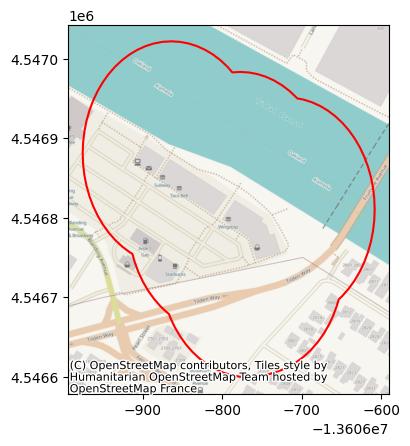

In [50]:
# existing code with default node and edge buffer
isopolygon_default = isopolygon_osm()

project_and_plot_isopolygon_exterior(isopolygon_default)

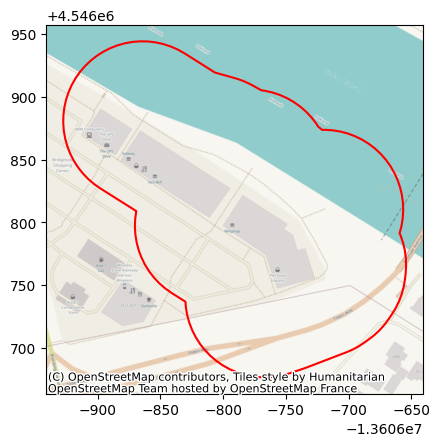

In [51]:
# new code with default buffer specified by Joaquim, 50 meters
isopolygon_default_alternative = isopolygon_osm_alternative()

project_and_plot_isopolygon_exterior(isopolygon_default_alternative)

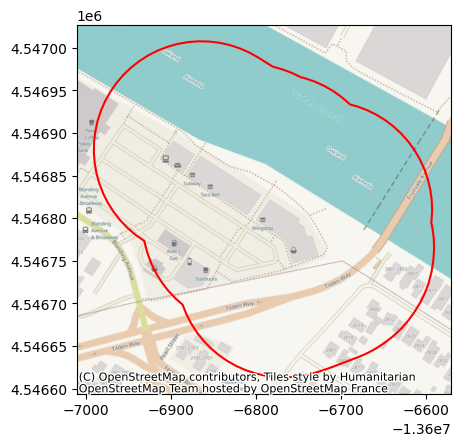

In [52]:
# new code with buffer 100 m
isopolygon_alternative_100 = isopolygon_osm_alternative(buffer=100)

project_and_plot_isopolygon_exterior(isopolygon_alternative_100)

### Comparing the areas 

In [49]:
def calculate_isopolygon_area(isopolygon: Polygon) -> float: 
    """ 
    Takes a shapely Polygon, projects it to web mercator CRS and returns its area in sqm
    """

    return gpd.GeoSeries(isopolygon, crs=unprojected_crs).to_crs(web_mercator_crs).area[0]



In [43]:
f"""The isopolygon as written in gpbp with default node and edge buffer has area = {calculate_isopolygon_area(isopolygon_default):,.0f} sqm"""

'The isopolygon as written in gpbp with default node and edge buffer has area = 108,453 sqm'

In [44]:

f"""The isopolygon as refactored in pisa with default buffer 50m has area = {calculate_isopolygon_area(isopolygon_default_alternative):,.0f} sqm"""


'The isopolygon as refactored in pisa with default buffer 50m has area = 47,104 sqm'

In [45]:
f"""The isopolygon as refactored in pisa with buffer 100m has area = {calculate_isopolygon_area(isopolygon_alternative_100):,.0f} sqm"""


'The isopolygon as refactored in pisa with buffer 100m has area = 112,974 sqm'

### Note: isopolygon interior can have holes

In [ ]:
# new code with buffer 15 m
isopolygon_alternative_15 = isopolygon_osm_alternative(buffer=15)

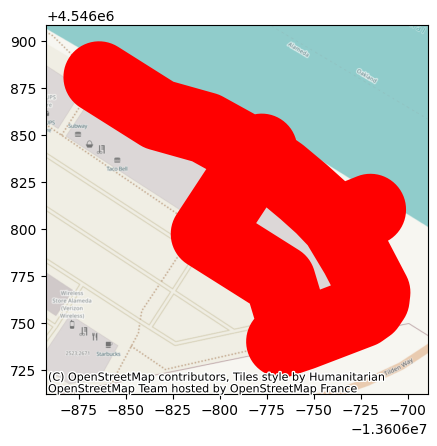

In [ ]:
# Plot the whole isopolygon

projected_poly = gpd.GeoSeries(isopolygon_alternative_15, crs=unprojected_crs).to_crs(web_mercator_crs)

ax = projected_poly.plot(markersize=4, color="red")
contextily.add_basemap(ax)
plt.show()  


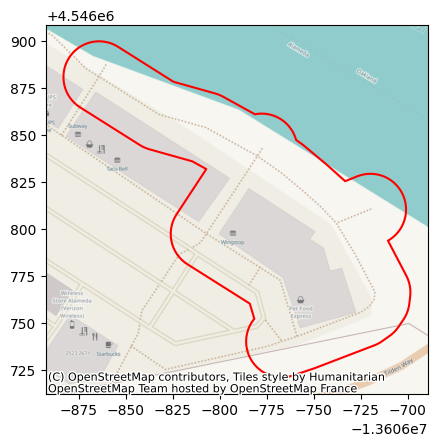

In [ ]:
# Plot only the exterior

project_and_plot_isopolygon_exterior(isopolygon_alternative_15)
